# Project 1 - Credit risk for mortgages

Consider a bank that must design a decision rule for granting loans to individuals. Some of each individual's characteristics are partially known to the bank. It can be assumed that the insurer has a linear utility for money and wishes to _maximize expected utility._ Assume that the $t$-th individual is associated with relevant information $x_t$, sensitive information $z_t$ and a potential outcome $y_t$, which is whether or not they will default on their mortgage. For each individual $t$, the decision rule chooses $a \in A$ with probability $\pi(a_t = a | x_t)$. $A$ can be defined as $A = [0, 1]$ , where $0$ means the loan was not granted and $1$ means the loan was granted.



The main goals of this project will be [(1)](#1-Maximizing-utility) to develop an algorithm that maximizes the utility of bank loans, [(2)](#2-Differential-privacy) protect the privacy of the individuals in the dataset through differential privacy, and [(3)](#3-Fairness) to ensure a concept of fairness in the model when deciding whether or not to grant new loans.

# Part 1
## Maximizing utility

First, a policy will be designed for granting or denying a loan to individuals based on the 20 features found in the `data/credit/german.data-mumeric` file.  The target variable for the decision model will be whether the loan granted was repaid or not, which can be found in column `repaid`. If the loan was repaid, this value will be 1, otherwise the value will be 2. 

Prior to this project, the dataset was split into training, validation, and test sets, each in their own respective files `D_train.csv`, `D_valid.csv`, and `D_test.csv`.

To start, the datasets need to be imported and prepared for the analysis.

## Importing and exploring datasets

In [1]:
# Preparing the notebook enviroment 
%load_ext autoreload
%autoreload 2

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# imports needed for this analysis
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [3]:
folder = '/mnt/c/Users/TFH/courses/IN9000/ml-society-science/data/credit'

The column names along with descriptions can be found in `data/credit/german.doc`. They are labeled manually below. 

In [4]:
features = ['checking account balance', 'duration', 'credit history',
            'purpose', 'amount', 'savings', 'employment', 'installment',
            'marital status', 'other debtors', 'residence time',
            'property', 'age', 'other installments', 'housing', 'credits',
            'job', 'persons', 'phone', 'foreign']
target = 'repaid' #values 1 and 2. 2 is bad (i.e defaulting mortgage), 1 is good (repay loan)

Importing datasets for train, validation and test

In [5]:
datasets = []
for file in ["D_train.csv","D_test.csv","D_valid.csv"]:
    adress = os.path.join(folder,file)
    dataset = pd.read_csv(adress, sep=' ', names=features+[target])
    datasets.append(dataset)
    print("Size of dataset: ", dataset.shape)
data_train, data_test, data_valid = datasets    

FileNotFoundError: [Errno 2] File b'/mnt/c/Users/TFH/courses/IN9000/ml-society-science/data/credit\\D_train.csv' does not exist: b'/mnt/c/Users/TFH/courses/IN9000/ml-society-science/data/credit\\D_train.csv'

As can be read above, the shapes of each of the pre-split datasets are equal.

A quick glimpse of the data-frame's structure can be observed using the `df.head()` and `df.describe()`functions.

In [7]:
data_train.head(5)

,checking account balance,duration,credit history,purpose,amount,savings,employment,installment,marital status,other debtors,...,property,age,other installments,housing,credits,job,persons,phone,foreign,repaid
0,4,0,1,8,9305,4,5,1,5,1,...,4,44,2,2,8,3,0,1,2,1
1,3,96,1,8,33073,4,3,4,2,2,...,4,71,3,1,1,3,0,1,2,2
2,4,0,0,8,1888,4,5,9,3,0,...,2,22,3,2,0,2,1,1,2,1
3,4,24,1,0,11882,4,1,8,4,2,...,4,53,3,1,1,4,3,1,2,1
4,3,18,0,10,23618,4,3,8,2,0,...,1,31,1,2,0,4,0,1,2,1


In [8]:
data_train.describe()

,checking account balance,duration,credit history,purpose,amount,savings,employment,installment,marital status,other debtors,...,property,age,other installments,housing,credits,job,persons,phone,foreign,repaid
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.0,1000.000000,1000.00000
mean,2.81700,52.962000,1.108000,5.658000,20389.262000,3.930000,3.204000,5.382000,2.284000,0.988000,...,3.017000,38.501000,2.187000,1.619000,0.97400,3.01900,2.487000,1.0,1.799000,1.31700
std,0.82595,54.153293,1.400106,2.783304,14758.780086,0.649247,1.220604,2.838685,1.514476,0.794032,...,1.001856,18.593163,0.871085,0.675496,1.38175,1.00879,3.055678,0.0,0.400949,0.46554
min,1.00000,0.000000,0.000000,0.000000,311.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,20.000000,1.000000,1.000000,0.00000,1.00000,0.000000,1.0,1.000000,1.00000
25%,2.00000,12.000000,0.000000,4.000000,9709.250000,4.000000,2.000000,3.000000,1.000000,0.000000,...,2.000000,25.000000,1.000000,1.000000,0.00000,2.00000,0.000000,1.0,2.000000,1.00000
50%,3.00000,36.000000,0.000000,6.000000,16395.500000,4.000000,3.000000,5.000000,2.000000,1.000000,...,3.000000,33.000000,2.000000,2.000000,0.50000,3.00000,2.000000,1.0,2.000000,1.00000
75%,3.00000,72.000000,2.000000,8.000000,27236.750000,4.000000,4.000000,8.000000,3.000000,2.000000,...,4.000000,46.000000,3.000000,2.000000,1.00000,4.00000,4.000000,1.0,2.000000,2.00000
max,4.00000,402.000000,4.000000,10.000000,92963.000000,5.000000,5.000000,10.000000,5.000000,2.000000,...,4.000000,152.000000,3.000000,3.000000,8.00000,4.00000,28.000000,1.0,2.000000,2.00000


## Feature engineering
This dataset contains both quantitative and qualitative data. The columns representing qualitative data have been given _arbitrary numeric values_ for the different values of each column. These data must therefore be one-hot encoded so as to not assign any unintentional scoring of certain values over others in these columns. 

To do this, the qualitative columns must first be filtered out of the whole datasets. The `pandas` function `get_dummies()` then can be used to efficiently execute the one-hot encoding.

Below, this process is accomplished through a local function defined as `feature_engineering()`. 

In [8]:
numerical_features = ['duration', 'age', 'residence time', 'installment', 'amount', 'persons', 'credits']
qualitative_features = list(filter(lambda x: x not in numerical_features, features))

In [9]:
def feature_engineering(dataset):
    """returns the dataset with feature engineered values"""
    X = pd.get_dummies(dataset, columns=qualitative_features, drop_first=True) #one-hot-encoding quantitative_features
    encoded_features = list(filter(lambda x: x != target, X.columns))
    features, targets = X[encoded_features], X[target]
    return features, targets

In [10]:
X_train, y_train = feature_engineering(data_train)
X_validate, y_validate = feature_engineering(data_valid)
X_test, y_test = feature_engineering(data_test)

The data is now prepared and ready to be fit to a model for maximizing utility.

## Visualizing relationship between features in dataset

Plots correlation matrix for inspecting numerical data. See that the correlation is very low between variables, indicating that most of the numerical features are important for prediction.

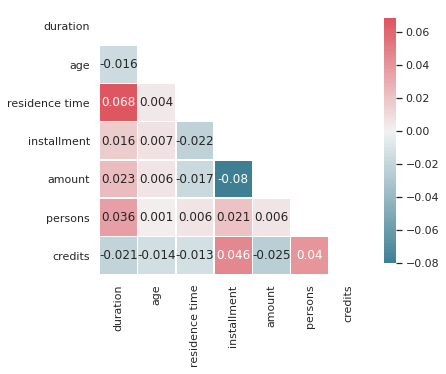

In [11]:
sns.set(style="white")
corr = data_train[numerical_features].corr().round(3)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(6, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap,mask=mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

Pairplot of some chosen features, illustrating relationship between variables, and highlighting target-values("repaid"). No distinct pattern, illustrating that many features are neccesary in the prediction model. Remember: 1 is good, 2 is bad.

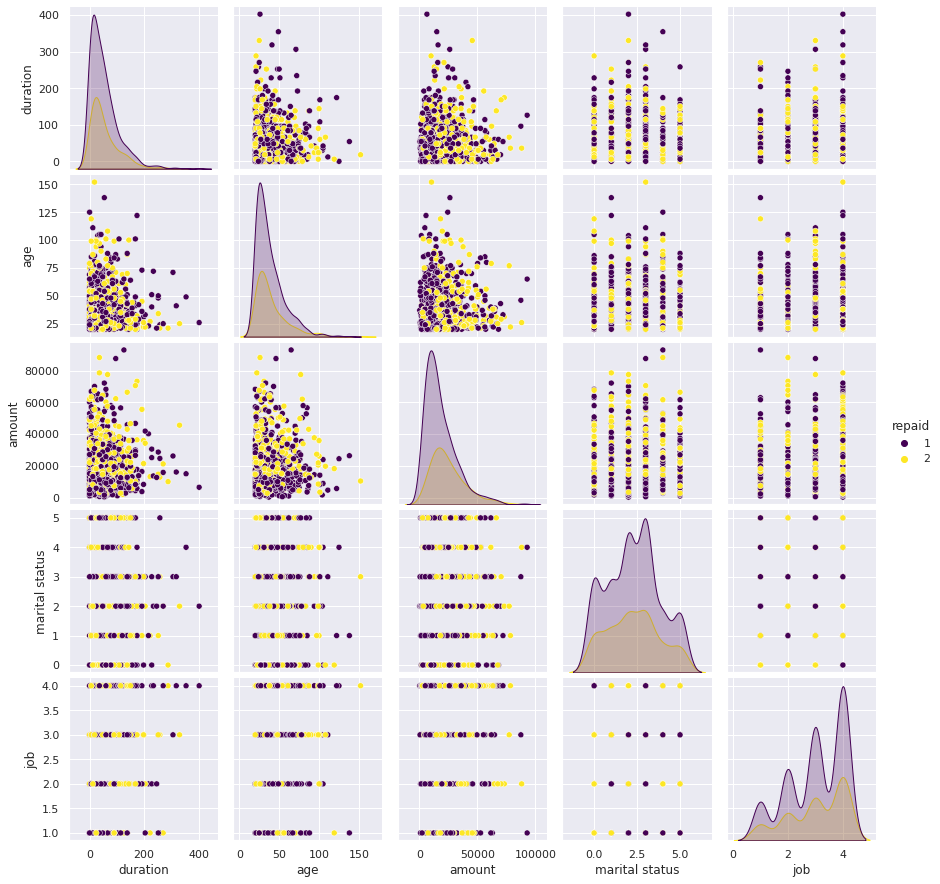

In [257]:
sns.set(style="darkgrid")
sns.pairplot(data_train[['duration','age','amount','marital status','job','repaid']], 
             diag_kind='auto', hue='repaid', palette="viridis");

## Model selection

In the process of developing machine learning models, datasets have been used in the following way:
- D_train for training of a model
- D_validate for tuning of hyperparameters for each model
- D_test for scoring og comparing models

### Benchmark

Before any statistical model is fit on the data, it is useful to analyze the bais present within the dataset. This process is called _benchmarking_ and can be done using `scikit-learn`'s `DummyClassifier()`, setting the parameter `strategy="most_frequent"`.

In [187]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy="most_frequent",random_state=0)
clf.fit(X_train,y_train)
print("QA from value_counts():\n",y_test.value_counts())
print("Accuracy in classification: ",clf.score(X_test,y_test))

QA from value_counts():
 1    658
2    342
Name: repaid, dtype: int64
Accuracy in classification:  0.658


In order for a model to be useful for this particular data, it must have an accuracy score better than this benchmark score of 65.8\%.

### Logistic Regression

A statistical model can now be fit on the training data. This will first be done using the `LogisticRegression` method found in `scikit-learn.linear_model`.

This method takes a hyperparameter `C` which regulates the model against overfitting. Tuning this `C` is done using a grid search cross validation method. This process is implemented in the `tune()` method of the `Group5Banker` class, which can be found in the attached python file `group5_banker_final.py`. It is important to note that this tuning is not autonomized, meaning it must be directly called in order to execute.

For other models, a different set of parameters can be given when creating a new instance of `group5_banker_final.Group5Banker`, as illustrated below.

In [55]:
import group5_banker_final
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Best parameters from GridSearchCV:  {'clf__C': 0.1}
Pipeline classfier and parameters:  Pipeline(steps=[('clf', LogisticRegression(C=0.1))])
Accuracy in classification:  0.65
Confusion matrix for the classification results


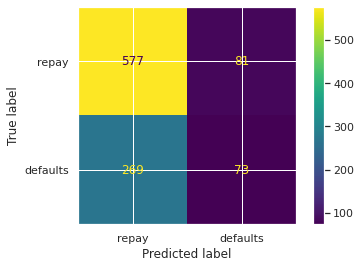

In [259]:
from sklearn.linear_model import LogisticRegression

params = {'C': [0.01, 0.1, 1.0, 10, 100]}
dm_logistic = group5_banker_final.Group5Banker(classifier=LogisticRegression(), parameters=params)
dm_logistic.set_interest_rate(0.017)
dm_logistic.tune(X_validate, y_validate) #TODO: use validation set for tuning parameters
dm_logistic.fit(X_train, y_train) 
print("Accuracy in classification: ",dm_logistic.model.score(X_test,y_test))
#plotting confusion matrix
print("Confusion matrix for the classification results:")
cm = confusion_matrix(y_test, dm_logistic.model.predict(X_test))
cm_display = ConfusionMatrixDisplay(cm, display_labels=["repay","defaults"]).plot()

The above accuracy score of 65% is no better than the dummy-model, indicating that the logistic regression model is not useful for further analysis. 

### Multinomial Naïve Bayes 
Usually in statistical analysis, building only one model is rarely enough. Since the goal is to maximize the utility of granting or denying loans, the model giving the _best accuracy score_ is desired. 

Another typical model used for classification of a dataset with multiple features is the multinomial naïve Bayes. This method can be implemented using `MultinomialNB` which is found in the `scikit-learn.naive_bayes` library. 

It takes in a hyperparameter `alpha` which also works to limit overfitting.

Best parameters from GridSearchCV:  {'clf__alpha': 0.0001}
Pipeline classfier and parameters:  Pipeline(steps=[('clf', MultinomialNB(alpha=0.0001))])
Accuracy in classification:  0.604


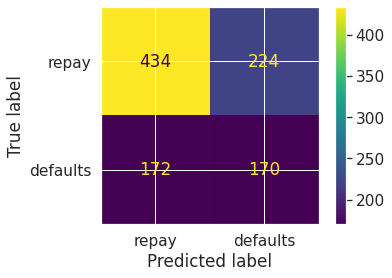

In [131]:
from sklearn.naive_bayes import MultinomialNB

params = {'alpha':[5, 1, 0.5, 0.1, 0.01, 0.001, 0.0001]}
dm_mnb = group5_banker_final.Group5Banker(classifier = MultinomialNB(), parameters=params)
dm_mnb.set_interest_rate(0.017)
dm_mnb.tune(X_validate, y_validate)
dm_mnb.fit(X_train, y_train)
print("Accuracy in classification: ",dm_mnb.model.score(X_test,y_test))
#plotting confusion matrix
print("Confusion matrix for the classification results:")
cm = confusion_matrix(y_test, dm_mnb.model.predict(X_test))
cm_display = ConfusionMatrixDisplay(cm, display_labels=["repay","defaults"]).plot()

This gave an accuracy score lower than the benchmark, meaning it classified the data worse than the bias in the data set. This tell us that this type of model is not a good model for this type of data.

### Random Forest Classifier

Best parameters from GridSearchCV:  {'clf__max_features': 20, 'clf__n_estimators': 50}
Pipeline classfier and parameters:  Pipeline(steps=[('clf',
                 RandomForestClassifier(max_features=20, n_estimators=50))])
Accuracy in classification:  0.744


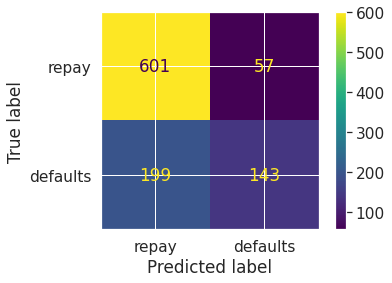

In [63]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators':[50,100,1000], 'max_features':[5,10,20]}
dm_rf = group5_banker_final.Group5Banker(classifier = RandomForestClassifier(), parameters=params)
dm_rf.set_interest_rate(0.017)
dm_rf.tune(X_validate, y_validate)
dm_rf.fit(X_train, y_train)
print("Accuracy in classification: ",dm_rf.model.score(X_test,y_test))
#plotting confusion matrix
print("Confusion matrix for the classification results:")
cm = confusion_matrix(y_test, dm_rf.model.predict(X_test))
cm_display = ConfusionMatrixDisplay(cm, display_labels=["repay","defaults"]).plot()

The model returns a better accuracy score than the dummy model, indicating that this is a useful model.

### Bernoulli Naïve Bayes

The score for the multinomial model was really bad, compared to the benchmark found above. This could be because multinomial naïve Bayes is a over-generalization of the Bernoulli model, at least for these data. A model can be fit using the regular Bernoulli to see if it can give a better result. 

`BernoulliNB` is also found in the `scikit-learn.naive_bayes` library, and also takes a hyperparameter `alpha`. 


Best parameters from GridSearchCV:  {'clf__alpha': 10}
Pipeline classfier and parameters:  Pipeline(steps=[('clf', BernoulliNB(alpha=10))])
Accuracy in classification:  0.74


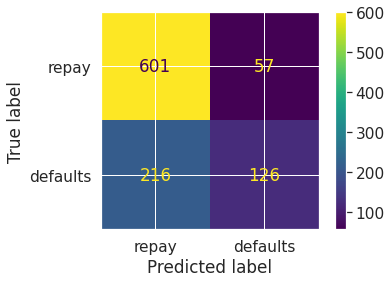

In [129]:
from sklearn.naive_bayes import BernoulliNB

params = {'alpha':[10, 5, 1, 0.5, 0.1, 0.01, 0.001, 0.0001]}
dm_bnb = group5_banker_final.Group5Banker(classifier = BernoulliNB(), parameters=params)
dm_bnb.set_interest_rate(0.017)
dm_bnb.tune(X_validate_scaled, y_validate)
dm_bnb.fit(X_train_scaled, y_train)
print("Accuracy in classification: ",dm_bnb.model.score(X_test_scaled,y_test))
#plotting confusion matrix
print("Confusion matrix for the classification results:")
cm = confusion_matrix(y_test, dm_bnb.model.predict(X_test))
cm_display = ConfusionMatrixDisplay(cm, display_labels=["repay","defaults"]).plot()

The Random Forest and the Bernoulli models are found to be the best models. We have chosen the Bernoulli model for the rest of this project, but we generally see that the models are not good at predicting the persons that defaults.

It is important to note that there exists numerous other model types that could have been tested for these particular data. These will be skipped over for now, but can be easily implement using the same proceedure as above.

### Checking functionality of the chosen model
To make sure the chosen model does in fact give reasonable answers, the results for a single individual can be found, as shown below. 

In [68]:
person = X_test.iloc[2]
print("Probability for repay (class 1): ",dm_bnb.predict_proba(person))
print("Expected utility for the person, given action 0 (not grant loan): ", dm_bnb.expected_utility(person,action=0))
print("Expected utility for the person, given action 1 (grant loan): ", dm_bnb.expected_utility(person,action=1))
print("Action for person: ", dm_bnb.get_best_action(person))
print('Repaid value for this person (2 is bad, 1 is good):', y_test.iloc[2])

Probability for repay (class 1):  0.23616048589474045
Expected utility for the person, given action 0 (not grant loan):  -0.0
Expected utility for the person, given action 1 (grant loan):  -7148.52188907988
Action for person:  0
Repaid value for this person (2 is bad, 1 is good): 2


The model gave a probability of repayment for this particular individual a low 23.6\%, with utilities $\leq 0$, and an action 0. This shows that the model provides the correct action based on the individual's probability of repayment. This classification also matches the true value for this individual, hinting that the model found above is working the way it is supposed to.

## Comparing implementations of different models

It's now time to compare the best models with the Random Banker given in the project. This testing procedure can be found in the `TestLending.py` that was attached to this project. This function works as a bootstrap-process, generating a new dataset each time, and hence new result-values, by using the train-test-split method over and over again. The test dataset (D_test) is used for this process.

Utility functions are first implemented

In [140]:
### Do a number of preliminary tests by splitting the data in parts
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [132]:
def test_decision_maker(X_test, y_test, interest_rate, decision_maker):
    """
    Test function for comparison of different implementations (from TestLending.py)
    """
    
    n_test_examples = len(X_test)
    utility = 0

    ## Example test function - this is only an unbiased test if the data has not been seen in training
    total_amount = 0
    total_utility = 0
    decision_maker.set_interest_rate(interest_rate)
    for t in range(n_test_examples):
        action = decision_maker.get_best_action(X_test.iloc[t]) #inputs a new person
        good_loan = y_test.iloc[t] # assume the labels are correct
        duration = X_test['duration'].iloc[t]
        amount = X_test['amount'].iloc[t]
        # If we don't grant the loan then nothing happens
        if (action==1):
            if (good_loan != 1): #ie wrong decision
                utility -= amount
            else:    
                utility += amount*(pow(1 + interest_rate, duration) - 1) #avkastning
        total_utility += utility
        total_amount += amount
    return utility, total_utility/total_amount #avkastning i kr og %

In [220]:
def test_algorithm(decision_maker, features, target):
    """
    The method runs the test_decision maker a number of times in a Bootstrap process.
    Returns: 
    - average utility
    - average return on investments
    - lists of values for utility and return on investment
    """
    n_tests = 100
    utility = 0
    investment_return = 0
    utility_vals = []
    return_vals = []
    
    for iter in tqdm(range(n_tests)):
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
        decision_maker.set_interest_rate(interest_rate)
        decision_maker.fit(X_train, y_train)
        Ui, Ri = test_decision_maker(X_test, y_test, interest_rate, decision_maker)
        utility += Ui
        investment_return += Ri
        utility_vals.append(Ui)
        return_vals.append(Ri)

    print("Average utility:", utility / n_tests)
    print("Average return on investment:", investment_return / n_tests)
    return utility / n_tests, investment_return / n_tests, utility_vals, return_vals

In [225]:
def confidence_intervals(data, data_type, dm_name):
    """Generating confidence intervals for a certain model:dm_name, and a certain data"""
    low = 2.5; high = 97.5
    conf_int = np.percentile(data, [low,high]).round(2)
    print("{0}: A {1} % confidence interval for {2} is {3}".format(data_type,high-low,dm_name,conf_int))

In [211]:
interest_rate = 0.017

### Random banker

The model for the random banker can be found in the python file `random_banker.py` attached to the project. The other models are fitted and tuned above.

In [212]:
import random_banker # this is a random banker
dm_random = random_banker.RandomBanker()

In [190]:
_,_,ru_list, rr_list = test_algorithm(dm_random,X_validate, y_validate)

100%|██████████| 100/100 [00:04<00:00, 24.70it/s]

Average utility: 1574747.4882352045
Average return on investment: 39.73472564244393


In [299]:
confidence_intervals(rr_list, "Return on investment", "Random Banker")
confidence_intervals(ru_list, "Utility", "Random Banker")

Return on investment: A 95.0 % confidence interval for Random Banker is [-30.08 419.51]
Utility: A 95.0 % confidence interval for Random Banker is [-1308829.59 11788939.56]


### Bernoulli

In [193]:
_,_,bu_list, br_list = test_algorithm(dm_bnb,X_validate, y_validate)

100%|██████████| 100/100 [00:12<00:00,  8.18it/s]

Average utility: 3979105.620523278
Average return on investment: 99.25087221060518


In [300]:
confidence_intervals(br_list, "Return on investment", "Bernoulli")
confidence_intervals(bu_list, "Utility", "Bernoulli")

Return on investment: A 95.0 % confidence interval for Bernoulli is [  1.65 429.14]
Utility: A 95.0 % confidence interval for Bernoulli is [  329426.88 12664203.01]


### Random Forest

In [226]:
_,_,rfu_list, rf_list = test_algorithm(dm_rf,X_validate, y_validate)

100%|██████████| 100/100 [03:01<00:00,  1.81s/it]

Average utility: 4841700.793806981
Average return on investment: 124.9545796823402


In [301]:
confidence_intervals(rf_list, "Return on investment", "Random Forest")
confidence_intervals(rfu_list, "Utility", "Random Forest")

Return on investment: A 95.0 % confidence interval for Random Forest is [ 17.58 435.64]
Utility: A 95.0 % confidence interval for Random Forest is [  543738.82 13866131.03]


### Graphical comparison

Histogram of running different decision makers 1000 times with different splits of dataset (i.e new datasets each time)

In [249]:
df_utility = pd.DataFrame({"Random Banker":ru_list, "Bernoulli":bu_list, "Random Forest":rfu_list})

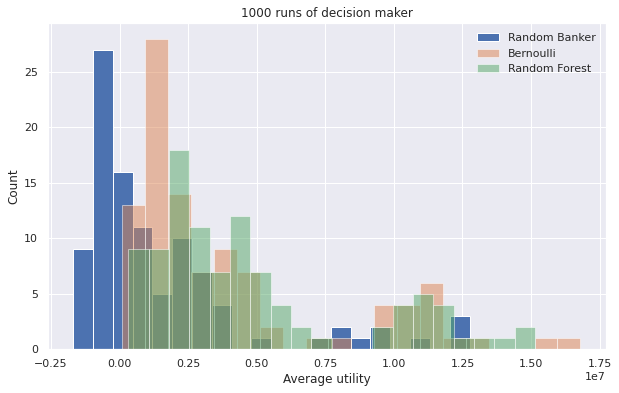

In [302]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df_utility['Random Banker'], bins=20, label="Random Banker")
ax.hist(df_utility['Bernoulli'], alpha=0.5,bins=20, label="Bernoulli")
ax.hist(df_utility['Random Forest'], alpha=0.5,bins=20, label="Random Forest")
ax.legend(loc="best", frameon=False)
ax.set_xlabel("Average utility")
ax.set_ylabel("Count")
ax.set_title("1000 runs of decision maker")
plt.show()

In [250]:
df_return = pd.DataFrame({"Random Banker":rr_list, "Bernoulli":br_list, "Random Forest":rf_list})

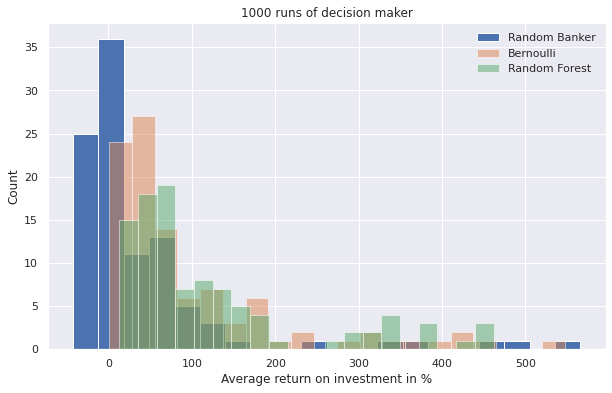

In [303]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df_return['Random Banker'], bins=20, label="Random Banker")
ax.hist(df_return['Bernoulli'], alpha=0.5,bins=20, label="Bernoulli")
ax.hist(df_return['Random Forest'], alpha=0.5,bins=20, label="Random Forest")
ax.legend(loc="best", frameon=False)
ax.set_xlabel("Average return on investment in %")
ax.set_ylabel("Count")
ax.set_title("1000 runs of decision maker")
plt.show()

From the numerical information and the graphical plots we see that the Bernoulli and Random Forest models performs better than the random banker class, with an average utility 4 times and and return roughly 3 times larger. From the graphical plots we also see that Bernoulli and Random Forest has no negative values and a lower variance (spread of data), indicating a more consistent results than the Random class, but the variance is still relatively high.

# Part 2

### 1. Maximizing utility and minimizing risk

#### Is it possible to ensure that your policy maximizes revenue? 

In order to maximize revenue, your model have to correctly classify each individual. This is generally very hard, especially in a large dataset. That means that some people will not get a loan even thought they would have repaid the loan and generated revenue.

TODO: Some more text.

#### How can you take into account the uncertainty due to the limited data? 

Generally label probabilities should be more uncertain when we have less data. This could be arranged by adjusting the probabilites related to distance to other datapoints. In KNN this way of adjusting is handled by the weights-parameter, changing from the default uniform to distance, i.e points further away is weighted down. 

Resampling techniques such as bootstrapping could also be used to generate many submodels based on subsamples of the limited data. The idea here is to generate new syntheic datasets by sampling the original data, with replacements. If this is done randomly and for enough iterations, the possibility of two identical data points will have little affect on the final model. An average of the submodels can then give a better estimate of the possible true state of the model than a single model built on the small dataset.

#### How can you take into account the uncertainty due to biased data? 

From the results of the ML-models tested out so far, we see (illustrated in the confusion matrix) that they struggle to model the class with the lowest number, the defaults class. One way to handle uncertainty due to biased data (or unbalanced datasets) is to use sampling algorithms to change the composition of the `training` dataset in order to improve the performance of the machine learning algorithm. One of the most popular methods is called SMOTE (Synthetic Minority Oversampling Technique). SMOTE produce new samples from the minority class by synthesizing from the existing examples.

In [296]:
import imblearn #includes SMOTE
from imblearn.pipeline import Pipeline

In [294]:
over = imblearn.over_sampling.SMOTE(sampling_strategy=0.9)
under = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=0.9)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_train_S, y_train_S = pipeline.fit_resample(X_train,y_train)

See that the shape of the data is longer and that the dataset now is balanced

In [304]:
y_train.value_counts()

1    683
2    317
Name: repaid, dtype: int64

In [292]:
y_train_S.value_counts()

1    682
2    614
Name: repaid, dtype: int64

In [297]:
y_train.shape

(1000,)

In [298]:
y_train_S.shape

(1296,)

Examplyfing for Random Forest

Accuracy in classification:  0.746
Confusion matrix for the classification results:


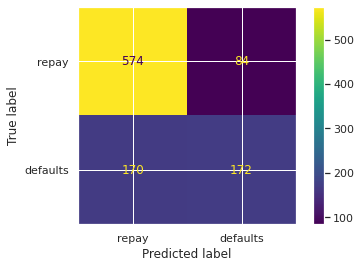

In [305]:
dm_rf = group5_banker_final.Group5Banker(classifier = RandomForestClassifier(n_estimators=50, 
                                                                         max_features=20), parameters=params)
dm_rf.set_interest_rate(0.017)

dm_rf.fit(X_train_S, y_train_S)

print("Accuracy in classification: ",dm_rf.model.score(X_test,y_test))
#plotting confusion matrix
print("Confusion matrix for the classification results:")
cm = confusion_matrix(y_test, dm_rf.model.predict(X_test))
cm_display = ConfusionMatrixDisplay(cm, display_labels=["repay","defaults"]).plot()

We did not get a higher accuracy, but we see that the classification of defaults are slightly better (and the repay-class is slightly worse).

#### What if you have to decide for credit for thousands of individuals and your model is wrong? 
How should you take that type of risk into account?

When making the decision for _a single individual,_ say the $t$-th person in the test dataset, the expected utility is calculated by summing the probabilities of the different outcomes multiplied by the respective utilities of those outcomes. 

$$
E[ U_t | a_t, x_t]  =  \sum_{y_t} P(y_t | x_t, a_t) U(y_t, x_t, a_t)
$$

For this particular project this equation unfolded would look something like:

$$
E[ U_t | a_t, x_t]  =  P(y=1 | x_t, a_t) U(y=1, x_t, a_t) + P(y=2 | x_t, a_t) U(y=2, x_t, a_t)
$$

However, this changes when calculating the expected utility for a large group. The same general structure of summing over the product of probability and utility for each outcome is maintained. The difference now is that we're looking at multiple instances instead of just one. The general expected utility of the whole set is found the sum of the product of the probability for _all of the outcomes in the data_ and the utility for _all of the data points._  

$$
E[ U | a, x]  =  \sum_{y} P(y | x, a) U(y, x, a)
$$

The probabilities for each row in the dataset produce the overall probability of the model being correct. This means the $P$ in above sum can be rewritten as:

$$
P( y|x,a)  = \prod_i P(y_i | x_i, a_i) 
$$

These probabilities are independent of each other.

The tricky part is finding an expression for the utility. For the individual, the utility for granting a loan could b either postive or negative, the latter meaning the customer defaulted. Generalizing this for the whole dataset would mean the bank would need to be willing to loose it's investment _for all of the customers._ 

$$
E[ U | a, x]  =  \sum_{y} \prod_i P(y_i | x_i, a_i) \sum_i U_i(y_i, x_i, a_i)
$$

This would require too much risk and is really not helpful. 

To avoid this problem, the idea of maximizing the expected utility needs to be implemented _for every single customer_. That means, deciding the action $a$ which always gives the largest utility for each customer. If the probability for defaulting combined with the amount of the loan (i.e. what the bank loses if the customer defaults) outweighs the probability of repayment with the possible return on investment, then the decision to not grant the loan should be made. 

For the `Group5_Banker()` instance, this decision process takes place in the method `get_best_action()`. It ensures that no loan is granted to customers with negative expected utility values.  In this way we will reduce the false positives, hence reduce the risk of giving loans to wrong people.

### 2. Privacy

#### Privacy concerns with the existence of this database.
This dataset consists of multiple columns containing personally identifiable information. The target `repaid` could also be considered private information, which should be protected, in some way or another. Local differential privacy can be implemented to obscured the identity of any one particular individual within the dataset.

#### Secret database but public credit decisions affects on privacy
One could slightly alter the values for specific features of new entries, and see how the credit decision changes. This way, one could easily reconstruct some of the data used to produce the model, without ever having to see the data. 

This is a [typical problem](https://ai.googleblog.com/2015/08/the-reusable-holdout-preserving.html) in machine learning competitions, where models are often tuned to get the best score on the holdout dataset by observing changes in accuracy scores, and slightly altering the affect of certain features have on the model with respect to these alterations.


#### Protecting the data of the people in the training set.
##### Local differential privacy
To protect the privacy of the individuals in the training data, the dataset should be funneled through a local differentially private algorithm, like the Laplace mechanism.

This type of algorithm alters the values of a data point's features based on the neighborhood the data point is found in. This way, the general trends for the model are preserved, while the true attribute values of any individual data point can only traced back to some range of possible values. 

The more features a data set has, the more complex this algorithm must be, to ensure privacy across all dimensions. Say there exists a dataset $D$ which has $k$ attributes. The _release_ of an attribute is defined as how much statistical information about that attribute's influence on a model can be made public, while still ensuring the privacy of the individuals in the dataset. The overall release allowed for a model is usually constrained by some threshold, $\epsilon$-DP. 

$\epsilon$-DP is defined as the following: <br>
Say there exists two data points $\mathbf{x} = (x_1, ..., x_j, ... x_n)$ and $\mathbf{x'}(x_1, ..., x_j', ... x_n)$, differing only in the value of the $j$-th attribute. Define the outcome prediction $y$ of a data point $\mathbf{z}$ as $f(\mathbf{z})=y$, with $y \in [y_1, y_2]$. Then, the privacy budget $\epsilon$ can be defined as:

$$
P(f(\mathbf{x})=y_1) \leq e^\epsilon P(f(\mathbf{x'})=y_1)
$$
This can be rewritten as 
$$
\Bigg|ln\Big(\frac{P(f(\mathbf{x})=y_1)}{P(f(\mathbf{x'})=y_1)}\Big)\Bigg| \leq \epsilon
$$

In other words, $\epsilon$ controls how much influence any particular attribute has on the final outcome prediction. A smaller $\epsilon$ guarantees more privacy of the dataset used to train the model.


_For $n$ users and $k$ attributes, if the release of each feature $i$ is $\epsilon$-DP then the data release is $k\epsilon$-DP. Thus to get $\epsilon$-DP overall, we need $\frac{\epsilon}{k}$-DP per attribute._ 

This means that, if we set a threshold $\epsilon$-DP for how much privacy is desired overall, and the number of attributes included in the model increases, the threshold for the amount of allowed release per attribute must decrease. 


##### Laplace mechanism
As mentioned above, the Laplace mechanism is one approach of implementing local differential privacy. 

Simply explained, this mechanism adds Laplace noise to each feature value of each data point. The amount of noise that is to be allowed to be injected $\omega$ is deduced from the Laplace density for each attribute:
$$
p(\omega | \mu, \lambda) = \frac{1}{2\lambda} e^{-\frac{|\omega-\mu|}{\lambda}}
$$

Here, $\mu$ is the average value of the attribute, and $2\lambda^2$ is it's variance.

#### b. Protecting the data of new loan applicants

There are two approaches that can help protect the privacy of new applicants; randomized response and the exponential mechanism.

##### Randomized Response
We can randomize the response value for new applicants so that no specific features are distinguishable as prominent in predicting the outcomes for new customers. The accuracy of the prediction for models using a randomized response will drop, as is intuitive, since every new decision will now include an element of luck. 

This approach requires defining a probability $\theta$ for how often the model should return the _true estimated decision_ for the new applicant. 

The responses for which something other than the truth is allowed should be given a random value within the range of the target variable. In this project, it would randomly select an action $a \in [0, 1]$. 

This creates a noisy response with estimated mean accuracy of $\theta \cdot p + (1-\theta)\cdot 0.5$, where $p$ is the accuracy of the model without a randomized response implemented.

##### Exponential mechanism
Like the Laplace mechanism for local differential privacy, the exponential mechanism implements an $\epsilon$-DP threshold to limit how much information can be made available about the new data point.

In the exponential mechanism, the probability of outcome $y$ for an action $a$ and a data point $x$ is proportional to the exponential of the threshold $\epsilon$ times the utility of the action $a$ for that $x$ divided by the largest difference in utility for neighboring data points. Mathematically, this is written as:

$$
P(a | x) \propto e^{\frac{\epsilon U(x, a)}{2\Delta}}
$$

where $\Delta = \text{max}\big|U(x, a) - U(x', a)\big|$. 

In the model created so far, the policy has been defined merely as choosing the action that returns the highest utility, i.e.:

$$
\pi (a|x) = \bigg\{
        \begin{array}{ll}
            a=0 & \quad U(x| a=0) > U(x| a=1) \\
            a=1 & \quad U(x| a=0) \leq U(x| a=1)
        \end{array} 
$$

To implement an exponential mechanism, this policy must be redefined to take into account the $\epsilon$-DP threshold. Mathematically, it should look like:

$$
\pi (a|x) = \frac{e^{\epsilon U(x, a)}}{\sum_{a'}{e^{ \epsilon U(x, a')}}}
$$

Simply explained, the choice of $a$ is now weighted by the sum of the exponentials respective to all values of $a$.

The policy is then defined as choosing the action which returns the highest value for this exponential mechanism.

#### c. Implementation of a private decision making mechanism for new loan applicants

The exponential mechanism can be activated in `Group5Banker()` instances by calling on the method `enable_privacy()`. Note, this method takes a parameter `epsilon`, which was given a default value of 0. If no `epsilon` is provided when privacy is (re)enabled, the strictest privacy policy possible is enforced, i.e. random actions are chosen for new applicants. 

`epsilon` can be tuned by giving different values for `epsilon`, then comparing the average utilities and returns on investments for new test data. An acceptable epsilon should give higher average utilities and returns on investment than the `random_banker()` model. 

A meaningful boundary for would be $0<\epsilon<1/N$ where $N$ is the number of rows in the training data set. For this project, this would be 
$$
0 < \epsilon < \frac{1}{1000}
$$

In [24]:
# Just rerunning the random banker for comparison
avg_util_random, avg_return_random = test_algorithm(dm_random,
                                                    X_validate, y_validate)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.00it/s]


Average utility: 689061.8477092781
Average return on investment: 17.26831595978384


In [33]:
avg_util_bnb, avg_return_bnb = test_algorithm(dm_bnb,
                                              X_validate, y_validate)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.22it/s]


Average utility: 4524602.739772749
Average return on investment: 110.59371115067195


In [26]:
def private_test_algorithm(decision_maker, features, target, epsilon):
    n_tests = 100
    utility = 0
    investment_return = 0
    for iter in tqdm(range(n_tests)):
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
        decision_maker.set_interest_rate(interest_rate)
        decision_maker.fit(X_train, y_train)
        
        # This is the only diff. from the test_algorithm() above
        decision_maker.enable_privacy(epsilon=epsilon)
        
        Ui, Ri = test_decision_maker(X_test, y_test, interest_rate, decision_maker)
        utility += Ui
        investment_return += Ri

    return utility / n_tests, investment_return / n_tests

In [37]:
epsilons = [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
e_scores = []

# create new model
dm_priv = group5_banker_final.Group5Banker(BernoulliNB(alpha=5))

for epsilon in epsilons:
    avg_util, avg_return = private_test_algorithm(dm_priv, 
                                          X_validate, y_validate, 
                                          epsilon)

    e_scores.append([avg_util, avg_return])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.49it/s]


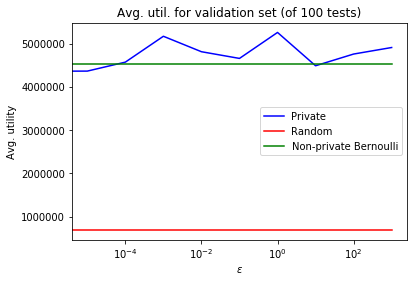

In [38]:
plt.semilogx(epsilons, np.array(e_scores)[:,0], 'b')
plt.semilogx(epsilons, np.full(len(epsilons),avg_util_random), 'r')
plt.semilogx(epsilons, np.full(len(epsilons),avg_util_bnb), 'g')
plt.legend(['Private', 'Random', 'Non-private Bernoulli'])
plt.xlabel('$\epsilon$')
plt.ylabel('Avg. utility')
plt.title('Avg. util. for validation set (of 100 tests)')
plt.show()

# PROBLEM

`TODO`: Per

__This plot should show what everyone is explaining about the exponential mechanism, i.e. that with epsilon=0, the avg utility be close to the random banker, and with epsilon=N=1000, the avg util and returns be close to the non-private Bernoulli model. For some reason, its not working out this way. The exponential mechanism I've implemented has 0 affect on the avg utility.__

Maybe check model scores? That wouldn't make sense... 

Maybe theres something wrong with the equation I've implemented? It seems to match exactly what is shown in the lecture slides/ in the [Duke slides](https://www2.cs.duke.edu/courses/fall12/compsci590.3/slides/lec8.pdf). And from my understanding, throwing an exponential on there wont change the proportionality between pi_0 and pi_1.

Maybe the clause 
```
if pi_0>pi_1:
    return 0
else:
    return 1
```
is wrong? Then how do you make the choice based off this exp. mech?

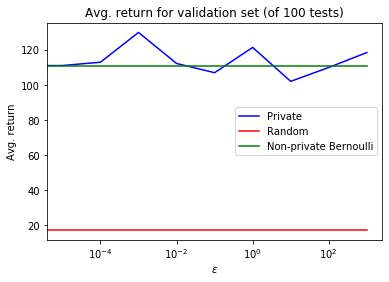

In [39]:
plt.semilogx(epsilons, np.array(e_scores)[:,1], 'b')
plt.semilogx(epsilons, np.full(len(epsilons), avg_return_random), 'r')
plt.semilogx(epsilons, np.full(len(epsilons), avg_return_bnb), 'g')
plt.legend(['Private', 'Random', 'Non-private Bernoulli'])
plt.xlabel('$\epsilon$')
plt.ylabel('Avg. return')
plt.title('Avg. return for validation set (of 100 tests)')
plt.show()

For very low values of $\theta$, the accuracy score is close to or roughly equal to our benchmark. $\theta>0.3$ gives accuracy scores greater than for our benchmark, telling us that the model is predicting better than the bias within the dataset. It's important to choose a $\theta$ as small as possible, while still maintaining a high enough accuracy for the model. From the results above, we can concluded a $\theta \approx 0.5$ seems like a reasonable fit for this particular data.

In [54]:
dm = group5_banker_final.Group5Banker(BernoulliNB(alpha=5))
dm.fit(X_train, y_train)
dm.model.score(X_test, y_test)

0.739

In [56]:
dm_priv = group5_banker_final.Group5Banker(BernoulliNB(alpha=5))
dm_priv.fit(X_train, y_train, private=True, theta=0.5)
dm_priv.model.score(X_test, y_test)

0.728

 We can compare the average utilities by running the same test as above two times; one for the unchanged model and one for a privitized model.

In [62]:
u, r = test_algorithm(dm, X_validate, y_validate)

100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.72it/s]


Average utility: 5039541.041468149
Average return on investment: 130.56243200916413


In [63]:
u_priv, r_priv = test_algorithm(dm_priv, X_validate, y_validate)

100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.10it/s]


Average utility: 4973316.13301764
Average return on investment: 120.58076732995286


In [65]:
u_priv/u , r_priv/r

(0.9868589405452651, 0.9235487228170608)

As we see, the results from our private model are pretty close to those for our regular model. The expected utility for the private model will always be slightly smaller than for the regular model. This is however a price we should be willing to pay to ensure privacy protection for the individuals used in the model.

# Part 3
(The slanted questions are from the project description, the other bullet points are my own notations.)

`TODO`: Begge

_Choose one concept of fairness, e-g- balance of decisions with respect to gender. How can we measure whether our policy is fair? How does the original training data affect the fairness of your policy? To help you in this part of the project, here is a list of guiding questions._


__*Questions:*__

_Do the original features imply some bias data collection?_
- Plot histogrammer for flere/alle features.
- What features are included in the dataset? Could any of these be considered "sensitive"? Are there any that seem irrelevant for loaning money?
		
_Analyze through statistics like histograms:_
- make some plots of distributions between features. Plot number of males vs females with repaid vs not, length. Same for some other features. 
    - look at jupyter notebooks from dirk
			
_For balance (or calibration), measure the total variation of the action (outcome) distribution for different outcomes (or actions) when the sensitive variable varies._
- Sample nye dummy dataset.
- The sensitive variable is the one we are choosing fairness for. Plot the utility for the data in the training set for the different actions. How do you do this? Are we estimating on new data here? Maybe forcefully changing only the sensitive variable to see how avg utility and return changes with the forced change? 
	
_What would happen if you were looking at fairness by also taking into account the amount of loan, size of amount requested?_
- making sure males and females within the same request range are treated fairly? i.e. group by N bins over amount, plot distributions of repaid/not. 
		
_Using stochastic gradient descent, find a policy that balances out fairness and utility._
- need to look over the lecture again to do this. he talked about this in the second half of 21.10.20 tutorial.
